# Text Analysis for Online Marketers

Text shows up in pretty much all fields of online marketing, in many different ways. I believe having a methodology for analyzing text is very important, because although text comes in different forms, there are structures and patterns that can be used to standardize the process.  
So what kind of text am I talking about, and what kind of analysis? 

#### The Text
Text typically comes as phrases, or short paragraphs along with numbers that describe it: 

Text | Metrics examples
------|-------------
Social media posts | follows, retweets, likes, engagements, impressions
SEM/SEO Keywords | impressions, clicks, conversions, bounce rate
Article titles | page views, engagements, bounce rate
Video titles | video views, likes, dislikes, shares
Page URLs (containing keywords) | page views, bounce rate, conversions
Product names | sales, orders, prices

#### The Analysis

There are numerous text mining techniques and approaches, and I will be focusing on two topics: 

##### 1. Extracting entities:

Although there is a set of techniques that try to figure out parts of a phrase or a sentence (people, countries, subject, predicate, etc.), which is formally called "entity extraction", I'll be extracting much simpler and structured entities. These typically appear in social media posts, and they are hashtags, mentions and emoji. There are others of course (like images, URL's, polls, etc.), but these are the three that I'll be handling.  

* **Hashtags:** Usually the most important words in a social media post, and can easily summarize what the post is about. Many times they are not words in the traditional sense, they can be brands, phrases, movement names, or acronyms. Their main power is that they efficiently summarize what the post is about.  
* **Mentions:** These are not words, but they serve to show connections between a post and another one (also connecting users to one another). They show conversations, and indicate whether or not a certain account(s) is meant to receive a certain message. In a social media posts data set, the more mentions you have, the more 'conversational' the discussion is. In more advanced uses, you can do network analysis, and see who the influential accounts (nodes) are and how they relate to others in terms of importance, power, and centrality to the network of posts.
* **Emoji:** An emoji is worth a thousand words! As images they are very expressive. They are also extremely efficient because they typically use one character each (sometime more though). Once we extract the emoji, we will get their names (represented as short phrases). This will allow us to treat those images as text, and we can run normal text analysis on them. Here are some emoji and their names for example:
    

Emoji | Name
---------|---------
🤣|rolling on the floor laughing
📖| open book
🔥| fire
🍚| cooked rice

##### 2. Word counting (absolute and weighted):

One of the basic things to be done in text mining is counting words (and phrases). A simple count would easily tell us what the text list about. However, we can do more in online marketing, especially that those text lists usually come with numbers that describe them, and can help us count better.  
Let's say we have set of Facebook posts that consist of two posts; "It's raining" and "It's snowing".  
If we count the words we will see that 50% of the posts are about raining and the other 50% are about snowing.  
Now what if I told you that the first post (rain) was published by a page that has one thousand fans/followers, and the other was published by a page that has ninety nine thousand fans?  
Counting the words we get a 50:50 ratio, but if we take into consideration the number of people who are reached by those posts, the ratio becomes 1:99.  
What we can do is count each word of each post not once, but the number of fans that it is expected to reach. This gives us a better idea of the importance of each post.  
What if we now discover another post that says, "It's windy", but this time it's from The Weather Channel who happens to have 8.5 million fans?  

Some other examples to make clearer: 

Assume I have a YouTube channel that teaches dancing, and I have two videos: 

Video Title | Views
---------------|----------------
Learn Salsa | 100 
Learn Tango | 900 

It's clear that the ratio of salsa to tango is 50:50 on an absolute basis, but on a weighted basis, it is 10:90. 

A travel website has a few pages about different cities: 

URL | Pageviews
-------|--------------------
/france/paris | 800 
/spain/madrid | 50 
/spain/barcelona | 50 
/spain/malaga | 50 
/spain/seville | 50 

Although 80% of the content is about Spanish cities, one French city generates 80% of traffic. If we were to send a survey to the site's visitors, and ask them what the website is about, 80% of them are going to remember Paris.  
In other words, in the eyes of the editorial team, they are a "Spanish" website, but in the eyes of readers, they are a "French" website.

The metric could be any other metric; sales, conversions, bounces, whatever you think is relevant for your case.

Finally, here is a real-life example of an analysis I ran on Hollywood movie titles: 

![](hollywood_word_freq.png)

Out of 15,500 movie titles, the most used word is "love", but that word is nowhere to be found in the top 20 list showing the words most associated with boxoffice revenue (it actually ranks 27).  
Of course the title of the movie is not what caused the revenue to be high or low, there are many factors. It still shows that movie producers believe that adding "love" to a title is good idea.  
On the other hand, "man" seems to be popular with producers, and also appears in movies that made a lot of money. 


For our example, I will be using a set of tweets together with their meta data. The tweets will be about the ongoing US government shutdown. As of this writing, it is now the longest shutdown in US history, and the tweets were requested on its twenty fifth day.


### Twitter Setup

In order to be able to send queries and receive responses from the Twitter API, you will need to do the following: 
1. [Apply for access as a developer](https://developer.twitter.com/en/apply-for-access).  Once approved, you will then need to get your account credentials.  
2. [Create an app](https://developer.twitter.com/en/apps). Then you will be able to get the app's credentials.
3. Get credentials by clicking on "details" and then "Keys and tokens" , Then you should see your keys, where they are clearly labelled; API key, API secret key, Access token, and Access token secret. 

Now you should be ready to interact with the Twitter API.  
There are several packages that help with this. I'll be using the Twitter module of the `advertools` package, because it combines several responses into one, and provides them as a DataFrame, which is ready to analyze. This enabls you to request a few thousand tweets with one line of code, and start analyzing right away.  
A DataFrame is simply a table of data. This is the data structure that is used by the popular data science languages, and it refers to a table that contains rows for every observation, and columns for every variable describing the observations. Each column would have one type of data in it (dates, text, integers, etc.). This is typically what we have when we analyze data, or export report for online marketing.  

### Overview of the third party Python packages used: 

1. [advertools](https://github.com/eliasdabbas/advertools): This package provides a set of tools for online marketing productivity and analysis. I wrote and maintain it, and it will be used for: 
    * Connecting to Twitter and getting the combined responses in one DataFrame
    * Extracting entities with the "extract_" functions. 
    * Counting words with the "word_frequency" function. 
2. [pandas](https://pandas.pydata.org/): This is one of the most popular and important Python packages, especially for data science applications, and it is mainly used for data manipulation; sorting, filtering, pivot tables, and all sorts of tools required for data analysis.  
3. [matplotlib](https://matplotlib.org/): This will be mainly used for data visualization. 

We first set up some variables and import the packages. The variables required will be the credentials we got from the Twitter apps dashboard.

In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import advertools as adv
import pandas as pd
pd.set_option('display.max_columns', None)


app_key = 'YOUR_APP_KEY'
app_secret = 'YOUR_APP_SECRET'
oauth_token = 'YOUR_OAUTH_TOKEN'
oauth_token_secret = 'YOUR_OAUTH_TOKEN_SECRET'

auth_params = {
    'app_key': app_key,
    'app_secret': app_secret,
    'oauth_token': oauth_token,
    'oauth_token_secret': oauth_token_secret,
}
adv.twitter.set_auth_params(**auth_params)

The first few lines make available the packages that we will be using as well as define some settings, while the second part defines the API credentials as variables with short names and sets up the login process. Now whenever you make a request to Twitter, the credentials will be included in your request and allow you to get your data.   
Now we are ready to request our main data set. In the code below, we define a variable called `shutdown` that will be used to refer to the DataFrame (table) of tweets that contain they keywords that we want.  
The query used is `"government shutdown" OR governmentshutdown -filter:retweets`.  
We are making sure to have the phrase as a two-word phrase or a single word. In addition to that we are filtering out retweets.  
The reason I like to remove retweets is that they are mainly repeating what other people are saying. I'm usually more interested in what people actively say, which is a better indication of what they feel or think. There are definitely cases where including retweets makes sense. We also specify the number of tweets that we want. I specified 5,000. There are certain limits to how many you can retrieve and you can check these out from Twitter's documentation. 

In [2]:
# shutdown = adv.twitter.search(q='"government shutdown" OR governmentshutdown -filter:retweets', 
#                               count=5000, tweet_mode='extended')

Now we have our DataFrame so let's start by exploring it a little.

In [3]:
shutdown = pd.read_csv('gov_shutdown.csv', parse_dates=['tweet_created_at', 'user_created_at'])
shutdown.shape

(5000, 75)

The "shape" of a DataFrame is an attribute that shows the number of rows and columns respectively.  
As you can see, we have exactly 5,000 rows (tweets), and we have 75 columns.  
Let's see what these columns are: 

In [4]:
shutdown.columns

Index(['tweet_contributors', 'tweet_coordinates', 'tweet_created_at',
       'tweet_display_text_range', 'tweet_entities', 'tweet_extended_entities',
       'tweet_favorite_count', 'tweet_favorited', 'tweet_full_text',
       'tweet_geo', 'tweet_id', 'tweet_id_str',
       'tweet_in_reply_to_screen_name', 'tweet_in_reply_to_status_id',
       'tweet_in_reply_to_status_id_str', 'tweet_in_reply_to_user_id',
       'tweet_in_reply_to_user_id_str', 'tweet_is_quote_status', 'tweet_lang',
       'tweet_metadata', 'tweet_place', 'tweet_possibly_sensitive',
       'tweet_quoted_status', 'tweet_quoted_status_id',
       'tweet_quoted_status_id_str', 'tweet_retweet_count', 'tweet_retweeted',
       'tweet_source', 'tweet_truncated', 'tweet_user',
       'user_contributors_enabled', 'user_created_at', 'user_default_profile',
       'user_default_profile_image', 'user_description', 'user_entities',
       'user_favourites_count', 'user_follow_request_sent',
       'user_followers_count', 'user_fol

Out of those columns there are maybe 20-30 that you won't usually use, but the rest can be really useful.  
The names of columns start with either "tweet_" or "user_". This means that the column contains data about the tweet itself, or about the user who tweeted that tweet, respectively.  
Now, let's use the `tweet_created_at` column to see what date and time range our tweets fall into. 

In [5]:
(shutdown['tweet_created_at'].min(), 
 shutdown['tweet_created_at'].max(), 
 shutdown['tweet_created_at'].max() - shutdown['tweet_created_at'].min())

(Timestamp('2019-01-15 15:38:20'),
 Timestamp('2019-01-15 17:56:07'),
 Timedelta('0 days 02:17:47'))

We took the minimum and maximum date/time values, and then got the difference.  
The 5,000 tweets were tweeted in two hours and seventeen minutes.  
This tells us how frequently people are tweeting about this particular topic. It also clearly indicates that we need to be very careful with our conclusions. Although five thousand is a large number of tweets, this is a very short time, and many things might be missing or under-represented. What if someone central and very important in this discussion, like Donald Trump tweeted something three minutes after I made the query? Or what if there were important news about when the shutdown issue would be resolved, half an hour later?  
In real life, you would have to make sure you are familiar with the topic so you know when something significant is missing. Ideally, you would want to run the same query several times to get a more accurate picture of how the conversation is progressing across longer periods of time.  
Now let's see who the top users are. The following code takes the `shutdown` DataFrame, selects four columns by name, sorts the rows by the column `user_followrs_count`, drops the duplicated values, and display the first twenty rows. Then it formats the followers' numbers by adding a thousand separator, to make it easier to read. 

In [6]:
(shutdown
 [['user_screen_name', 'user_name', 'user_followers_count', 'user_verified']]
 .sort_values('user_followers_count', ascending=False)
 .drop_duplicates('user_screen_name')
 .head(20)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,user_followers_count,user_verified
4777,nytimes,The New York Times,"42,655,745",True
4834,CNN,CNN,"41,125,999",True
388,WSJ,The Wall Street Journal,"16,314,082",True
598,ABC,ABC News,"14,066,895",True
2055,NewYorker,The New Yorker,"8,589,327",True
2579,ELLEmagazine,ELLE Magazine (US),"6,776,192",True
1000,NBCNews,NBC News,"6,345,126",True
2658,SkyNews,Sky News,"4,814,078",True
4780,politico,POLITICO,"3,727,692",True
1115,thehill,The Hill,"3,185,232",True


It seems Donald Trump didn't tweet anything about the shutdown during this period.  
Also, the largest accounts are mainly mainstream media accounts, and all of them are verified accounts. We have two accounts with more than forty million followers, which have the power to tilt the conversation one way or the other.  
They are pretty much all part of the "Fake News Media", which immediately raises the question, "where is @FoxNews?".  
Knowing that the tweets happened during less than two and a half hours, Fox must have tweeted before or after I ran the query.  
Let's see what @FoxNews's latest tweets are.  
The following code defines a variable `foxnews`, which basically requests this user's timeline, asking for the latest five hundred tweets. 

In [7]:
# foxnews = adv.twitter.get_user_timeline(screen_name='@FoxNews', tweet_mode='extended', count=500)
foxnews = pd.read_csv('foxnews.csv', parse_dates=['tweet_created_at', 'user_created_at'])

In [8]:
(foxnews.tweet_created_at.min(),
 foxnews.tweet_created_at.max(),
 foxnews.tweet_created_at.max() - foxnews.tweet_created_at.min())

(Timestamp('2018-11-06 07:15:00'),
 Timestamp('2018-11-08 19:18:44'),
 Timedelta('2 days 12:03:44'))

Checking the minimum and maximum dates and times like we did above, we see that the latest five hundred tweets were made during a two and a half day period, but the last tweet was on November 8, 2018. This looks strange.  
Going to [@FoxNews](https://twitter.com/foxnews)'s profile page on Twitter, I was able to confirm that they haven't been tweeting since last November. 

In [9]:
%%html
<img src="foxnews_twitter_acct.png">

After a bit of Googling I figured out that Fox is boycotting Twitter by not tweeting, in protest of Twitter's handling of an incident related to one of Fox's journalists.  
This is another great example of missing data that are very important to have. With 18.5 million followers, Fox would have ranked third in the users of this data set. Fox would probably have views more supportive of Trump, so this dataset is heavily influenced by the "Fake News", and the biggest ones are mainstream outlets (not popular individuals as you might get in other conversations on Twitter).  
Big media companies like Fox usually have more than one account. They probably have @foxalerts or maybe @foxeconomics. Let's see.  
The following code filters the `shutdown` DataFrame to show rows where the `user_screen_name` contains "fox".

In [10]:
(shutdown
 [shutdown['user_screen_name'].str.contains('fox', case=False)]
 [['user_screen_name', 'user_followers_count', 'user_verified']]
 .sort_values('user_followers_count', ascending=False)
 .drop_duplicates('user_screen_name')
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_followers_count,user_verified
4742,FOX5Atlanta,"605,643",True
2110,foxnewsalert,"498,245",True
3349,FOX26Houston,"297,038",True
676,fox5dc,"268,689",True
2878,FOX59,"250,801",True
1734,FOXBaltimore,"155,885",True
1832,FOX61News,"136,736",True
481,fox7austin,"121,772",True
3409,wchs8fox11,"67,684",True
403,FOX46News,"26,561",True


Indeed, there are several Fox accounts, the majority of which are verified accounts. Their total followers add up to around two million, which is not insignificant. Still, it's much less than @FoxNews's 18.5 million, and nowhere near @NYTimes and @CNN.  

The values in the column `user_verified`, take one of two possible values; True or False. Let's see how many of each we have to see how "official" those tweets are. 

In [11]:
shutdown.drop_duplicates('user_screen_name')['user_verified'].value_counts()

False    4152
True      394
Name: user_verified, dtype: int64

394 out of 4,152+394=4,546 accounts (around 8.7%) are verified. That's quite high and is expected for such a topic.  

Another interesting column is the `tweet_source` column. This tell us what application the user used to make that tweet.  
The following code shows the counts of those applications in three different forms:  
1. `number`: the absolute number of tweets made with that application
2. `percentage`: the percentage of tweets made with that application (30.08% were made with the Twitter Web Client for example)
3. `cum_percentage`: the cumulative percentage of tweets made with applications up to the current row (web, iPhone, and Android combined, were used to make 61.9% of tweets for example)

In [12]:
(pd.concat([shutdown['tweet_source'].value_counts()[:15].rename('number'), 
            shutdown['tweet_source'].value_counts(normalize=True)[:15].mul(100).rename('percentage'),
            shutdown['tweet_source'].value_counts(normalize=True)[:15].cumsum().mul(100).rename('cum_percentage')], axis=1)
 .reset_index()
 .rename(columns={'index': 'tweet_source'}))

,tweet_source,number,percentage,cum_percentage
0,Twitter Web Client,1504,30.08,30.08
1,Twitter for iPhone,1076,21.52,51.60
2,Twitter for Android,515,10.30,61.90
3,Facebook,309,6.18,68.08
4,IFTTT,290,5.80,73.88
5,TweetDeck,168,3.36,77.24
6,Hootsuite Inc.,137,2.74,79.98
7,dlvr.it,125,2.50,82.48
8,Twitter Lite,118,2.36,84.84
9,Twitter for iPad,101,2.02,86.86


In case you didn't know, IFTTT (If This Then That on row 4) is an app that automates many things, which you can program to fire certain events when certain conditions are satisfied. So with Twitter, a user can probably retweet any tweet that is tweeted by a certain account and containing a certain hashtag for example.  
In our data set, we have two hundred and ninety tweets from IFTTT, so these are automated tweets. TweetDeck and Hootsuite are used by people or agencies who run social media account professionally and need the scheduling and automation that they provide.  
This gives us some hints about how our users are tweeting, and might also give some insights on the relative popularity of the apps themselves and what kind of accounts use them.  
There are more things that can be explored, but let's start extracting the entities and see what we can find.

## Emoji

There are currently three "extract_" functions, which work pretty much the same way, and produce almost the same output. `extract_emoji`, `extract_hashtags`, and `extract_mentions` all take a text list, and return a Python "dictionary".  
This dictionary is similar to a normal dictionary, in the sense it has keys and values, in place of words and their meanings, respecitvely.  
In order to access the value of a certain key from the dictionary, you can use `dictionary[key]` and that gives you the value of the of the key saved in the dicionary. We will go through examples below to demonstrate this.  
This is technically not a correct description of the Python dictionary data structure, but just a way to think about it if you are not familiar with it. 

In [13]:
emoji_summary = adv.extract_emoji(shutdown['tweet_full_text'])

We create a variable `emoji_summary`,  which is a Python dictionary. Let's quickly see what its keys are.

In [14]:
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'overview'])

We will now explore the most important ones.

In [15]:
emoji_summary['overview']

{'num_posts': 5000,
 'num_emoji': 494,
 'emoji_per_post': 0.0988,
 'unique_emoji': 161}

The `overview` key contains a general summary about the emoji. As you can see, we have 5,000 posts, with 494 occurrences of emoji. We have a little less than 10% emoji per post, and the posts contain 161 unique emoji.  
The average is around 10%, but it's always useful to see how the data are distributed. We can have a better view of that by accessing the `emoji_freq` key. This shows how frequenty the emoji were used in our tweets. 

In [16]:
emoji_summary['emoji_freq']

[(0, 4747),
 (1, 165),
 (2, 34),
 (3, 26),
 (4, 19),
 (5, 2),
 (6, 3),
 (7, 1),
 (9, 1),
 (12, 1),
 (51, 1)]

We have 4,747 tweets with zero emoji, 165 tweets with one emoji, and so on.  
Let's quickly visualize the above data.

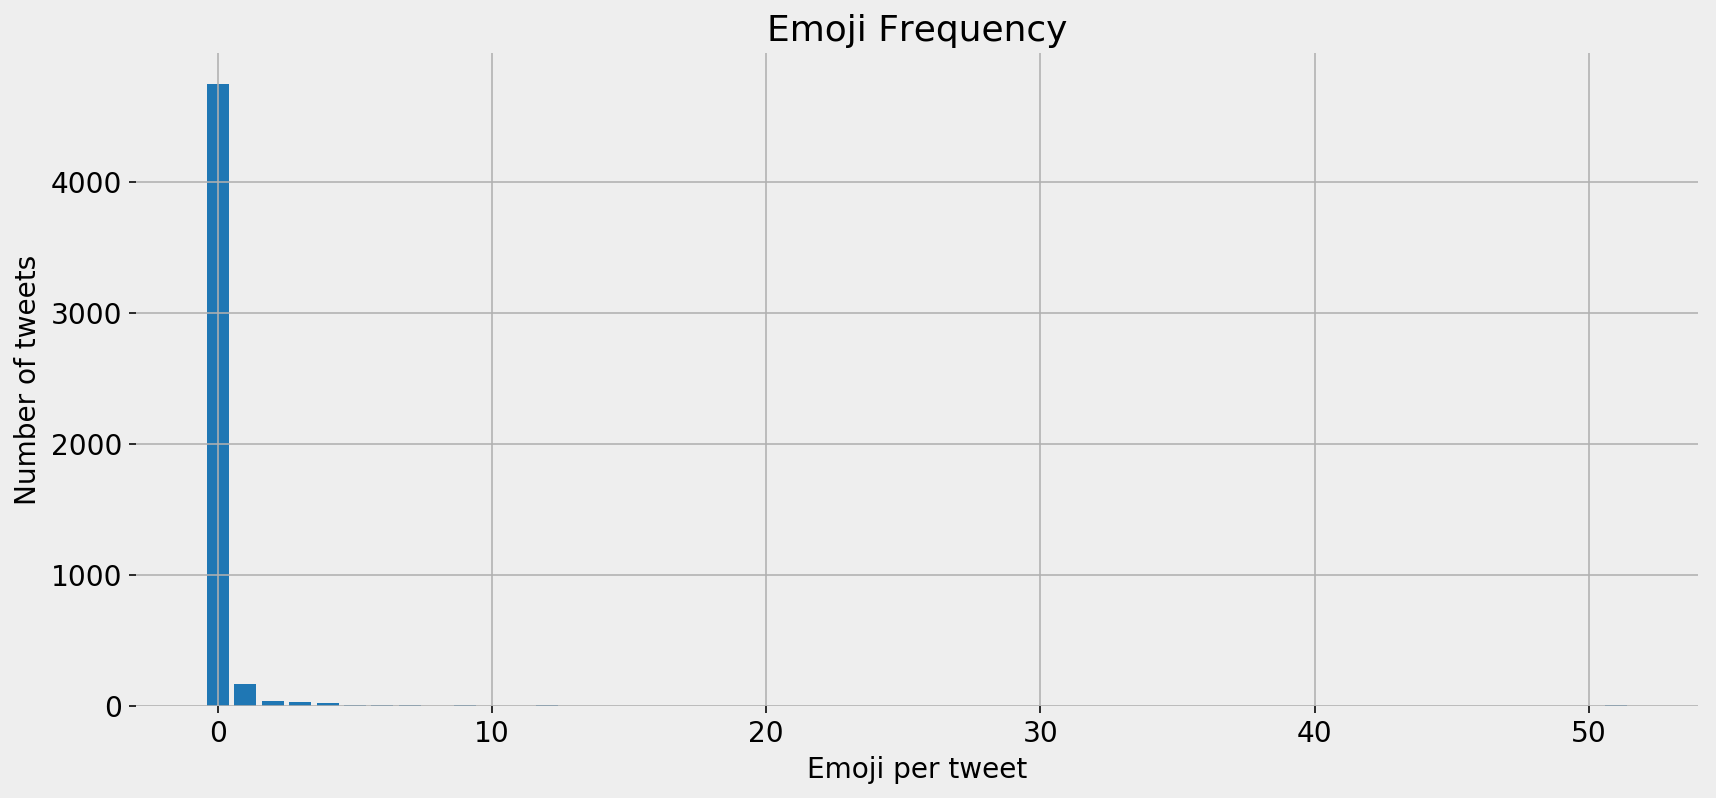

In [17]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((14, 6))
ax.set_frame_on(False)
ax.bar([x[0] for x in emoji_summary['emoji_freq']],
       [x[1] for x in emoji_summary['emoji_freq']])
ax.tick_params(labelsize=14)
ax.set_title('Emoji Frequency', fontsize=18)
ax.set_xlabel('Emoji per tweet', fontsize=14)
ax.set_ylabel('Number of tweets', fontsize=14)
ax.grid()
plt.show()

You are probably wondering what the top emoji used were. These can be extracted by accessing the `top_emoji` key.

In [18]:
emoji_summary['top_emoji'][:20]

[('😂', 86),
 ('🤔', 26),
 ('🤣', 19),
 ('🇺🇸', 15),
 ('⬇', 15),
 ('🙄', 14),
 ('👉', 9),
 ('‼', 7),
 ('⚡', 7),
 ('😡', 7),
 ('👿', 7),
 ('👏', 7),
 ('😠', 7),
 ('💯', 6),
 ('🍔', 6),
 ('🔥', 6),
 ('❤', 6),
 ('😱', 6),
 ('🙏', 5),
 ('😩', 5)]

Here are the names of the top twenty emoji.

In [19]:
emoji_summary['top_emoji_text'][:20]

[('face with tears of joy', 86),
 ('thinking face', 26),
 ('rolling on the floor laughing', 19),
 ('United States', 15),
 ('down arrow', 15),
 ('face with rolling eyes', 14),
 ('backhand index pointing right', 9),
 ('double exclamation mark', 7),
 ('high voltage', 7),
 ('pouting face', 7),
 ('angry face with horns', 7),
 ('clapping hands', 7),
 ('angry face', 7),
 ('hundred points', 6),
 ('hamburger', 6),
 ('fire', 6),
 ('red heart', 6),
 ('face screaming in fear', 6),
 ('folded hands', 5),
 ('weary face', 5)]

Now we simply combine the emoji with their textual representation together with their frequency.

In [20]:
for emoji, text in (zip([x[0] for x in emoji_summary['top_emoji'][:20]], 
                        emoji_summary['top_emoji_text'][:20], )):
    print(emoji,  *text, sep='  ')

😂  face with tears of joy  86
🤔  thinking face  26
🤣  rolling on the floor laughing  19
🇺🇸  United States  15
⬇  down arrow  15
🙄  face with rolling eyes  14
👉  backhand index pointing right  9
‼  double exclamation mark  7
⚡  high voltage  7
😡  pouting face  7
👿  angry face with horns  7
👏  clapping hands  7
😠  angry face  7
💯  hundred points  6
🍔  hamburger  6
🔥  fire  6
❤  red heart  6
😱  face screaming in fear  6
🙏  folded hands  5
😩  weary face  5


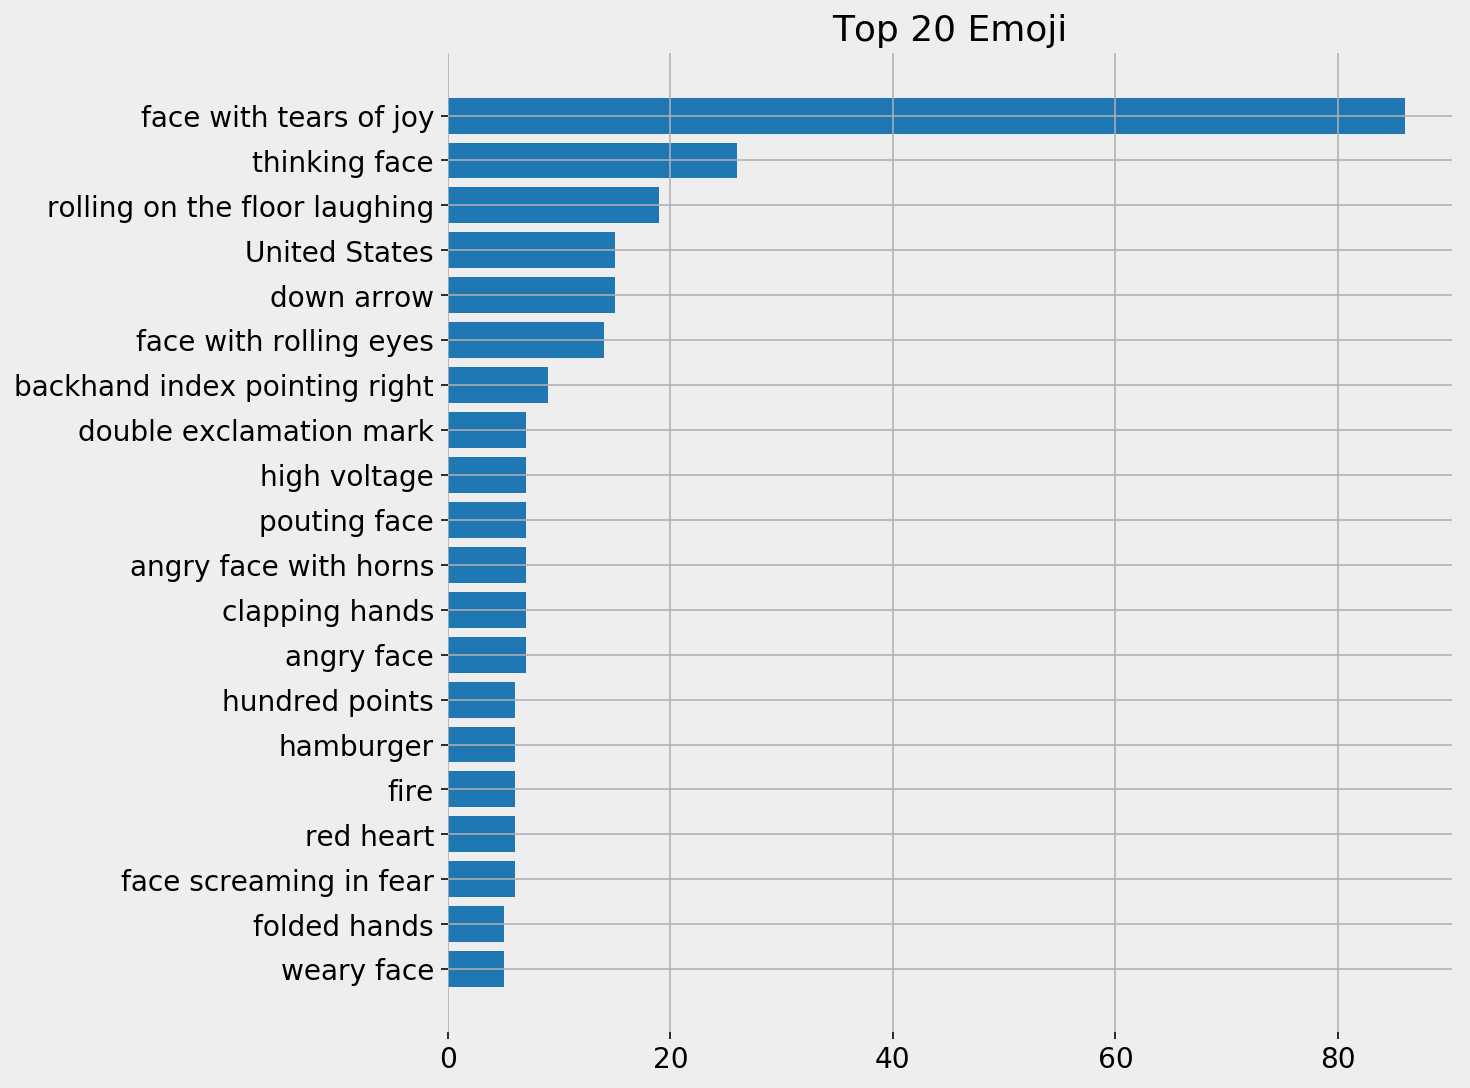

In [21]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((9, 9))
ax.set_frame_on(False)
ax.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
        [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
ax.tick_params(labelsize=14)
ax.set_title('Top 20 Emoji', fontsize=18)
ax.grid()
plt.show()

The "face with tears of joy" emoji seems to be by far the most used.  
Let's see how people are using it. Here are the tweets containing it.

In [22]:
[x for x in shutdown[shutdown['tweet_full_text'].str.contains('😂')]['tweet_full_text']]

['When your stomach is on E!!!!!!!!! Because the government shutdown @KodakBlack1k  remix #worldstar let me in 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂… https://t.co/HKqu6rWnWD',
 'I have noticed since this government shutdown I haven’t got any spam calls..🤔😂',
 'And I KNOW Alabama ain’t too mad abt losing now! 😂😂😂😂 #ClemsonTigers #RollTide #GovernmentShutdown',
 "@emmaG2412 @SpeakerPelosi @realDonaldTrump Really stupid to attempt this as an argument against Pelosi's government shutdown. Wth? 😂",
 '@realDonaldTrump Fast food??? The POTUS, due to his own government shutdown, could only pay for fast food? 🤣 You’re pathetic! Why not bring in some Trump Steaks? What’s that? The business flopped? Sharper Image dumped them like 10 yrs ago? 😂\n\n#ImpeachTheMF 🔥\n#IndictTheMF 🔥\n#ImprisonTheMF https://t.co/bfcqQ3o6Qx',
 '@Giotto_mkd Нема готвачи и персонал ради government shutdown-от што сам го направи 😂😂\nClassy AF',
 "Okay I wasn't gone ask about the Clemson White House visit but 

As you can see, there seems to be one tweet with a massive number of this emoji.  
Let's see how many times this emoji has been used per tweet.  
The following code counts the occurrences of this emoji for each tweet, sorts them in descending order, and shows the top five values.

In [23]:
shutdown['tweet_full_text'].str.count('😂').sort_values(ascending=False).head()

101     51
822      4
4212     4
2968     3
2701     3
Name: tweet_full_text, dtype: int64

It seems the top tweet used it fifty one times, then it goes down to four and three, and so on.  
Let's get some more data about the accounts that made those tweets.

In [24]:
pd.set_option('display.max_colwidth', 280)
(shutdown[shutdown['tweet_full_text'].str.count('😂') > 1]
 [['user_screen_name', 'user_name', 'tweet_full_text', 'user_followers_count', 
   'user_statuses_count', 'user_created_at']]
 .head())

,user_screen_name,user_name,tweet_full_text,user_followers_count,user_statuses_count,user_created_at
101,H2LOW404,BRIAN,When your stomach is on E!!!!!!!!! Because the government shutdown @KodakBlack1k remix #worldstar let me in 😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂😂… https://t.co/HKqu6rWnWD,58,4916,2010-03-16 04:30:30
822,princessdevy03,👸🏾Black Princess👸🏾,And I KNOW Alabama ain’t too mad abt losing now! 😂😂😂😂 #ClemsonTigers #RollTide #GovernmentShutdown,288,77152,2009-08-09 20:08:52
1758,JustPurpling,Purp #DefendDACA,@Giotto_mkd Нема готвачи и персонал ради government shutdown-от што сам го направи 😂😂\nClassy AF,9105,65719,2009-05-31 20:35:12
1814,Pray4Rockie,♡,Okay I wasn't gone ask about the Clemson White House visit but can somebody please the part where Trump said he bought the fast food because of the Government shutdown?😂😂,1078,14380,2014-02-17 04:16:45
2269,adadonamission,Richard Wygand,"Survey for President, look at the options? There is no option for bad, poor, or anything bad 😂😂😂 what kind of survey is that? #bullshit #GovernmentShutdown #Trump https://t.co/xYECTidWaA",644,7336,2009-10-15 02:41:11


H2LOW404 our top account, has been created in March 2010, made 4,916 tweets and only managed to attract 58 followers. pricessdevy03 tweeted 77,152 times since August 2009, and has 288 followers. Some of these might indicate that the account might not be genuine. Why would you make twenty tweets a day, everyday, for almost ten years non-stop, if you only have 288 followers?  
You might want to come up with your own criteria to check whether or not an account is automated or genuinely managed by a human. I don't see anything wrong with automated accounts. Many of them provide really useful information. The problem is with accounts that try to conceal that they are bots, and want you to believe that they are human.  
The third account JustPurpling, is similar but it managed to get nine thousand followers, so this account is relatively influential, whether it is a fake account or not. Its tweets are in Russian.  

## Hashtags

We do the same with hashtags.

In [25]:
hashtag_summary = adv.extract_hashtags(shutdown['tweet_full_text'])

In [26]:
hashtag_summary['overview']

{'num_posts': 5000,
 'num_hashtags': 3677,
 'hashtags_per_post': 0.7354,
 'unique_hashtags': 1473}

In [27]:
hashtag_summary['hashtag_freq'][:11]

[(0, 3570),
 (1, 684),
 (2, 296),
 (3, 190),
 (4, 93),
 (5, 52),
 (6, 27),
 (7, 24),
 (8, 8),
 (9, 12),
 (10, 10)]

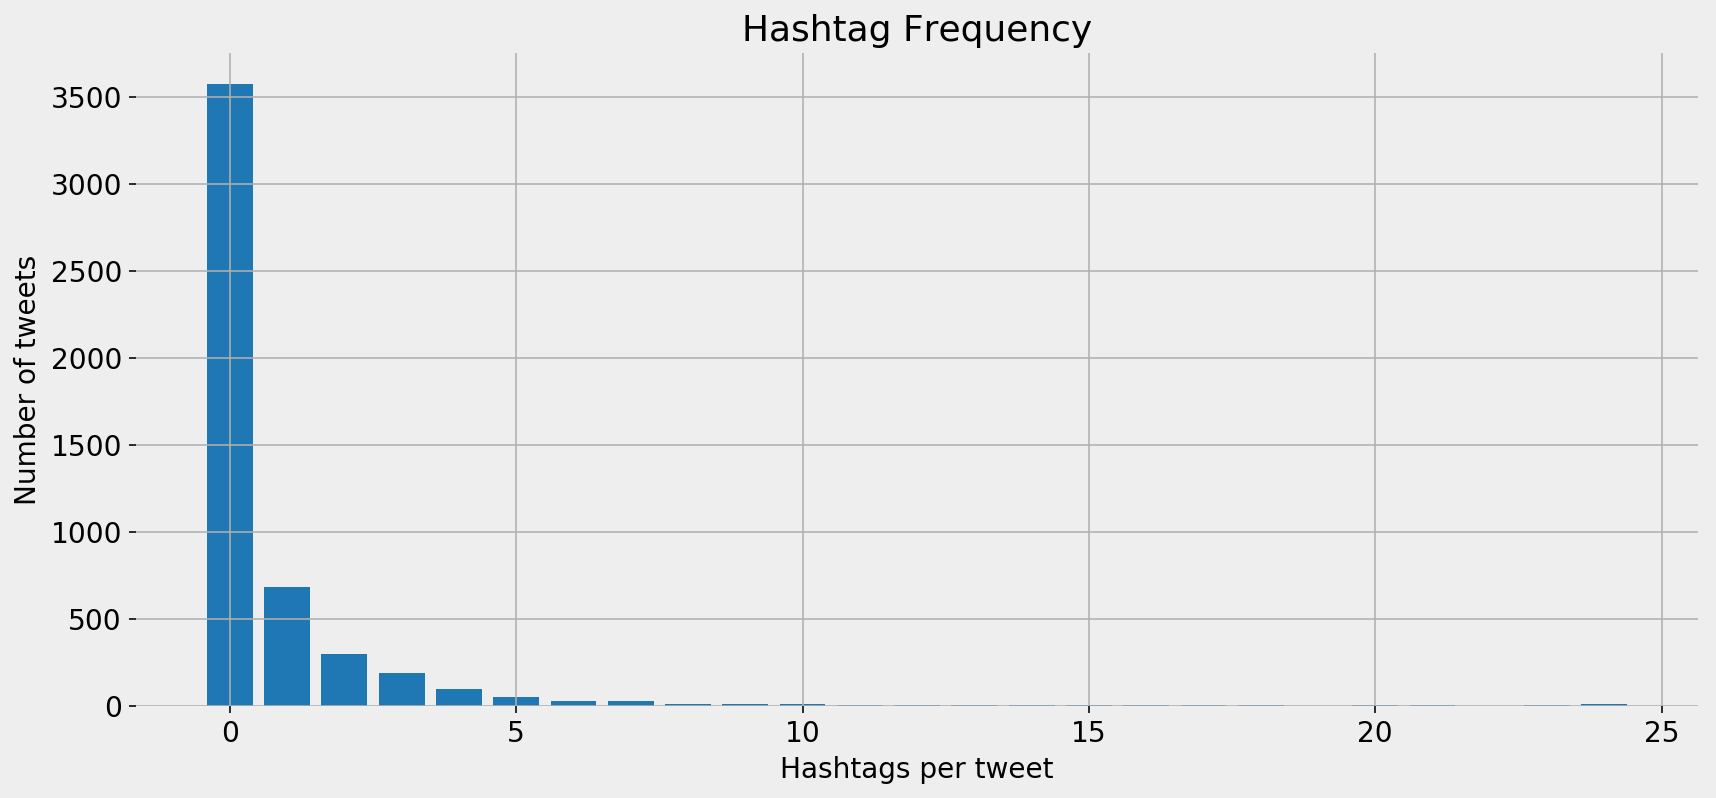

In [28]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((14, 6))
ax.set_frame_on(False)
ax.bar([x[0] for x in hashtag_summary['hashtag_freq']],
       [x[1] for x in hashtag_summary['hashtag_freq']])
ax.tick_params(labelsize=14)
ax.set_title('Hashtag Frequency', fontsize=18)
ax.set_xlabel('Hashtags per tweet', fontsize=14)
ax.set_ylabel('Number of tweets', fontsize=14)
ax.grid()
plt.show()

In [29]:
hashtag_summary['top_hashtags'][:20]

[('#governmentshutdown', 717),
 ('#shutdown', 134),
 ('#foxnews', 113),
 ('#trumpshutdown', 103),
 ('#trump', 56),
 ('#shutdownstories', 44),
 ('#endtheshutdown', 42),
 ('#maga', 30),
 ('#government', 24),
 ('#buildthewall', 23),
 ('#democrats', 21),
 ('#smartnews', 18),
 ('#borderwall', 16),
 ('#snap', 14),
 ('#impeachtrump', 14),
 ('#fda', 14),
 ('#tuesdaythoughts', 13),
 ('#news', 13),
 ('#gop', 12),
 ('#gopshutdown', 11)]

The first two hashtags are clearly in the right spot, because by definition, these are tweets that contain keywords related to the ongoing government shutdown. The third and forth are much more interesting though.  
Although @FoxNews doesn't have any tweets in our data set, the most used hashtag is about them.  
#TrumpShutdown is also interesting as it hints that most people think of it as Trump's shutdown (it is his fault and not the Democrats'). A tweet that contains #TrumpShutdown doesn't necessarily mean that it endorses this belief, it could be someone against it and trying to make themselves heard by getting into this discussion. We will verify more when we take into consideration the weighted counts of these hashtags later. Also keep in mind that it only takes one tweet to tilt the balance in a certain direction, so we need to be careful in our conclusions.  
Here are the hashtags visualized, excluding the expected ones. 

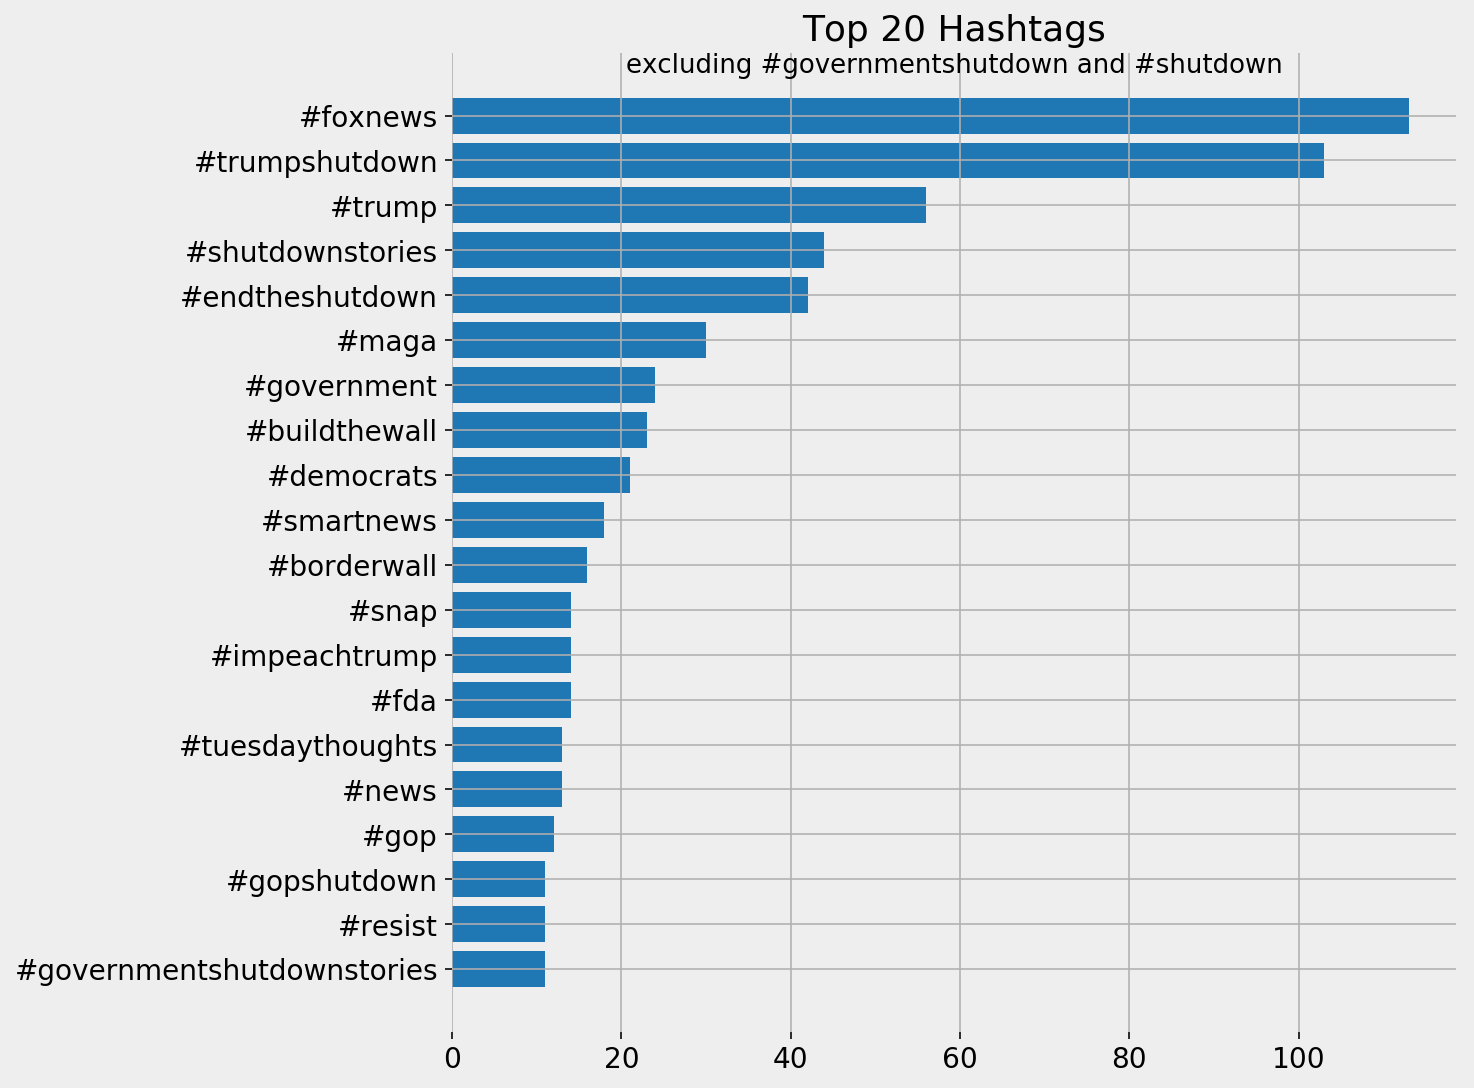

In [30]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((9, 9))
ax.set_frame_on(False)
ax.barh([x[0] for x in hashtag_summary['top_hashtags'][2:22]][::-1],
        [x[1] for x in hashtag_summary['top_hashtags'][2:22]][::-1])
ax.tick_params(labelsize=14)
ax.set_title('Top 20 Hashtags', fontsize=18)
ax.text(0.5, .98, 'excluding #governmentshutdown and #shutdown',
        transform=ax.transAxes, ha='center', fontsize=13)
ax.grid()
plt.show()

To know more about the hashtag that mentions Fox News, we can simply filter the tweets that contain it and sort them by the number of followers.  

In [31]:
(shutdown
 [shutdown['tweet_full_text'].str.contains('#foxnews', case=False)]
 [['user_screen_name', 'user_name', 'user_followers_count','tweet_full_text', 'user_verified']]
 .sort_values('user_followers_count', ascending=False)
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,user_followers_count,tweet_full_text,user_verified
1935,freedom_moates,Michael 🇺🇸,"290,823","Breaking #FoxNews Alert : Congressional Democrats boycott White House meeting to discuss border security, end to partial government shutdown",True
2002,ChuckCallesto,Chuck Callesto,"163,906","Breaking #FoxNews Alert : Congressional Democrats boycott White House meeting to discuss border security, end to partial government shutdown",True
1966,peterboykin,Peter Boykin 🇺🇸🐘 #AntiHate #FreeSpeech Activist,"77,960","Breaking #FoxNews Alert : Congressional Democrats boycott White House meeting to discuss border security, end to partial government shutdown",True
698,JewhadiTM,Jewhadi™,"62,281",Trump suggests @SpeakerPelosi should stop getting a paycheck amid shutdown https://t.co/n19rCbrjXL #FoxNews,False
1948,reversetees,reversetees,"18,511","Breaking #FoxNews Alert : Congressional Democrats boycott White House meeting to discuss border security, end to partial government shutdown",False
376,skinpo,"Marvin Skinner, MBA, Economist, Psychotherapist,","18,184","By refusing to negotiate in good faith and refusing to meet on the budget and Border wall funding, the Democrats now own the Government shutdown, 100%! https://t.co/eT3tTDCCap #FoxNews",False
4564,KimWelzenbach,#USAFirst! ⭐️⭐️⭐️,"16,266",Trump suggests Pelosi should stop getting a paycheck amid shutdown https://t.co/JF69JhVxLS #FoxNews,False
2015,PhillySpotLight,PhillySpotLight,"15,540","Breaking #FoxNews Alert : Congressional Democrats boycott White House meeting to discuss border security, end to partial government shutdown",False
1256,cattinks,cattinks,"14,217",Trump suggests Pelosi should stop getting a paycheck amid shutdown = @SpeakerPelosi refuses to do her job https://t.co/M5ehbHxGbl #FoxNews,False
1996,cholrulz,str8trippin,"9,891","Breaking #FoxNews Alert : Congressional Democrats boycott White House meeting to discuss border security, end to partial government shutdown",False


It is mainly people sharing news from Fox News saying that congressional democrats are boycotting a meeting to discuss border security. In other words, the democrats are to blame, when it comes to the government shutdown.  
Here are the top tweets containing #TrumpShutdown, so we can see what people are saying. Note that the code is exactly the same as the one above, except that I changed the hashtag. So it's very easy to come up with your own filter and analyze another keyword or hashtag.

In [32]:
(shutdown
 [shutdown['tweet_full_text'].str.contains('#trumpshutdown', case=False)]
 [['user_screen_name', 'user_name', 'user_followers_count','tweet_full_text', 'user_verified']]
 .sort_values('user_followers_count', ascending=False)
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,user_followers_count,tweet_full_text,user_verified
4193,PattyMurray,Senator Patty Murray,"411,080",From workers and families being impacted in specific ways to entire industries & regions being harmed—this #TrumpShutdown is very real for millions & millions of people in WA & across the country. I want to hear your #ShutdownStories. Submit them here ➡ https://t.co/9m89QKbvE0,True
1171,IndivisibleTeam,Indivisible Guide,"261,825","Last week, House Dems passed FOUR more bills to reopen the govt. Once again, Mitch McConnell has refused to bring ending the #TrumpShutdown up for a vote. A government shutdown is not business as usual. Call your Senator & tell them to play hardball: https://t.co/YzyqNfUaIb https://t.co/901LYjG7mc",True
3754,RepJayapal,Rep. Pramila Jayapal,"93,566","Washington state's beautiful parks are facing years of damage because of the #TrumpShutdown. It's time for Trump to put aside his vanity wall, prioritize working Americans, protect our parks and #EndtheShutdown. https://t.co/ShZm9oA0e6",True
4655,MomsRising,MomsRising,"63,627","The #TrumpShutdown has not only left people without critical services and federal employees without a paycheck, it also is costing us money. CALL Congress now and tell them to re-open the government and put an end to Trump’s wall tantrum! 1-844-633-2048 https://t.co/IAMiErz8Bd",True
4854,NydiaVelazquez,Rep. Nydia Velazquez,"46,934","On Sunday I joined with fed'l workers & subcontractors from NYC who shared stories of how they are paring back expenses and making sacrifices because of the #TrumpShutdown. It's repugnant for @WhiteHouse officials to say these workers are ""better off. "" https://t.co/HXVyoBXray",True
1250,jmsexton_,Michael Sexton,"39,588",Congress prepares to cancel next week’s recess if shutdown drags on https://t.co/XLCE4gRkkZ #TrumpShutdown,False
741,janschakowsky,Jan Schakowsky,"38,791",62 percent of Urban Indian Health Centers will need to cancel programs or stop offering services if the #TrumpShutdown continues. Americans deserve better. #EndTheShutdown https://t.co/ryeZ9gLxgg,True
3229,RepRaulGrijalva,Raul M. Grijalva,"33,424","Our national parks are facing a crisis during the #TrumpShutdown. Trashcans are overflowing, visitors face dangerous circumstances without pay personnel, and rampant vandalism is destroying our national treasures. It's time for Trump to #EndTheShutdown. https://t.co/TPh3lVMQ0C",True
3603,American_Bridge,American Bridge,"28,675","An estimated 110,000 indigenous Alaskans depend on critical government services that are threatened because of the #TrumpShutdown. Call @SenDanSullivan today and tell him to stand up to Mitch McConnell and reopen the gov’t: 202 224-3004 #AKSen https://t.co/q6JWn4DnRT",True
119,ericswalwell,Eric Swalwell,"25,379",The #TrumpShutdown continues to make us less safe. The blame falls on Trump for weakening our security and borders. https://t.co/0lK72a5CWl,True


## Mentions

In [33]:
mention_summary = adv.extract_mentions(shutdown['tweet_full_text'])

In [34]:
mention_summary['overview']

{'num_posts': 5000,
 'num_mentions': 2801,
 'mentions_per_post': 0.5602,
 'unique_mentions': 1441}

In [35]:
mention_summary['mention_freq']

[(0, 3256),
 (1, 1253),
 (2, 273),
 (3, 113),
 (4, 49),
 (5, 24),
 (6, 8),
 (7, 11),
 (8, 2),
 (9, 3),
 (10, 2),
 (11, 1),
 (12, 1),
 (17, 1),
 (21, 1),
 (48, 1),
 (50, 1)]

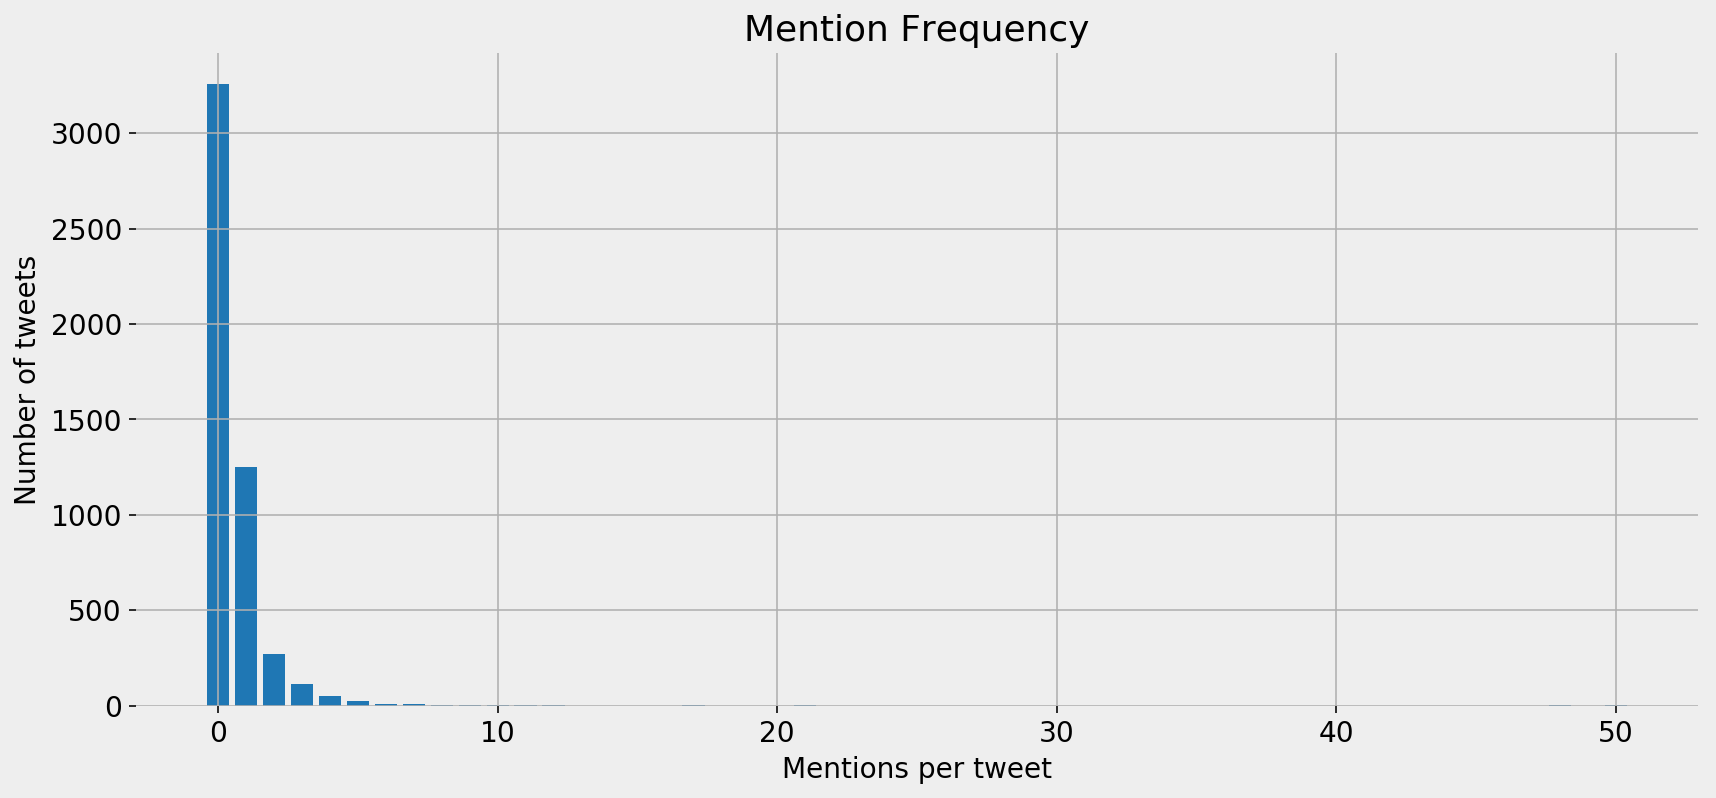

In [36]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((14, 6))
ax.set_frame_on(False)
ax.bar([x[0] for x in mention_summary['mention_freq']],
       [x[1] for x in mention_summary['mention_freq']])
ax.tick_params(labelsize=14)
ax.set_title('Mention Frequency', fontsize=18)
ax.set_xlabel('Mentions per tweet', fontsize=14)
ax.set_ylabel('Number of tweets', fontsize=14)
ax.grid()
plt.show()

In [37]:
mention_summary['top_mentions'][:20]

[('@realdonaldtrump', 359),
 ('@youtube', 89),
 ('@speakerpelosi', 54),
 ('@senatemajldr', 52),
 ('@potus', 45),
 ('@nytimes', 35),
 ('@gatewaypundit', 30),
 ('@senschumer', 24),
 ('@clemsonfb', 23),
 ('@gop', 22),
 ('@googlenews', 21),
 ('@usatoday', 21),
 ('@cnn', 19),
 ('@senategop', 17),
 ('@whitehouse', 16),
 ('@presssec', 15),
 ('@huffpost', 14),
 ('@voxdotcom', 14),
 ('@politico', 13),
 ('@washingtonpost', 13)]

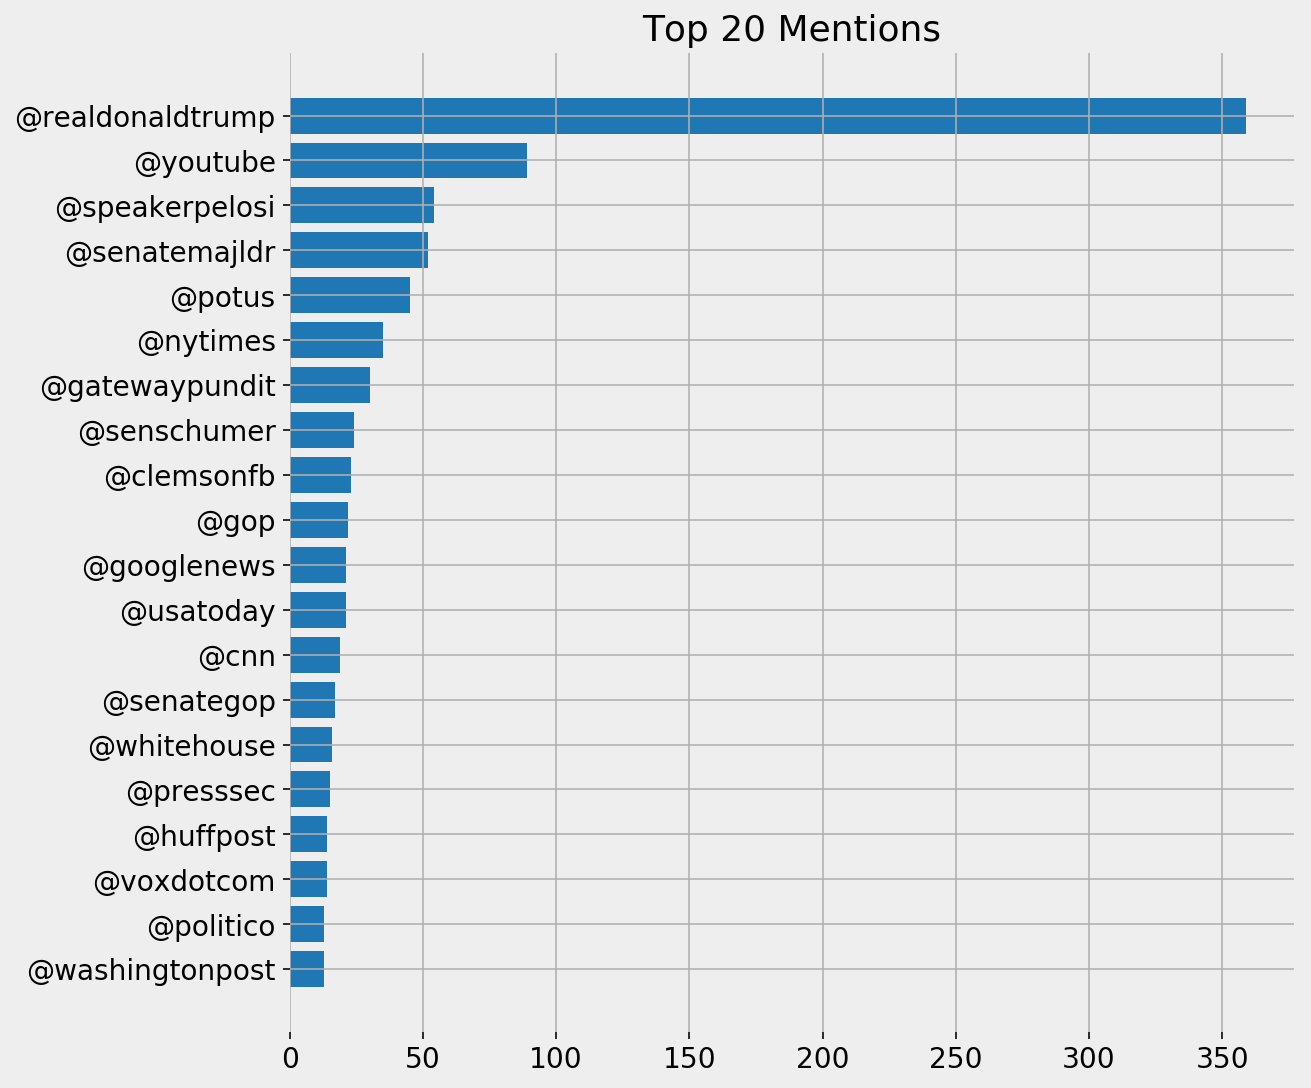

In [38]:
fig, ax = plt.subplots(facecolor='#eeeeee')
fig.set_size_inches((9, 9))
ax.set_frame_on(False)
ax.barh([x[0] for x in mention_summary['top_mentions'][:20]][::-1],
        [x[1] for x in mention_summary['top_mentions'][:20]][::-1])
ax.tick_params(labelsize=14)
ax.set_title('Top 20 Mentions', fontsize=18)
ax.grid()
plt.show()

It is expected to have @realDonaldTrump as one of top mentioned accounts, and here are the top tweets that mention him.

In [39]:
pd.set_option('display.max_colwidth', 280)
(shutdown
 [shutdown['tweet_full_text'].str.contains('@realdonaldtrump', case=False)]
 .sort_values('user_followers_count', ascending=False)
 [['user_followers_count', 'user_screen_name', 'tweet_full_text', 'user_verified']]
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_followers_count,user_screen_name,tweet_full_text,user_verified
676,"268,689",fox5dc,"#BREAKING: Democrats rejected President @realDonaldTrump's invitation to a meeting at the @WhiteHouse to discuss border security, in the latest sign that both sides of the #GovernmentShutdown standoff remain entrenched in their positions https://t.co/Vbpfc3fjth",True
1983,"141,737",PeterSchiff,@realDonaldTrump Why not encourage Congress to pass a bill suspending all Congressional pay during any manner of government shutdown? It would be interesting to see who votes against it. It should provide that any missed pay not be made up after the shutdown ends.,False
570,"83,928",RTUKnews,"""All American companies, @BurgerKing, @Wendys and @McDonalds"" @realDonaldTrump reveals why he chose 1,000 hamburgers for US national champion Clemson Tigers instead of salads during the government shutdown. Courtesy: The White House 🥗🍔 https://t.co/hqkNilo5bw",True
1626,"72,943",SKYRIDER4538,"@thebestine @Atlantiso1 @MyDrinkingsoda @jobash @real_defender @realDonaldTrump That wasn’t a defense, it was a response to a stupid tweet. My defense was that we have a government shutdown so and he made a great decision. Now go poke your head elsewhere 😉😆",False
1723,"69,910",blacklungdenver,@realDonaldTrump A penny saved is a penny earned I support building the border Wall because good fences make good neighbors😀#MakeAmericaGreatAgain #GovernmentShutdown,False
3601,"59,934",Onelifetogive,@SpeakerPelosi @realDonaldTrump I'm curious what you think @realDonaldTrump is doing to cause a #GovernmentShutdown. He has not vetoed any government funding legislation.,False
629,"55,451",almostjingo,The @washingtonpost is more horrified that @realDonaldTrump purchased fast food out of his pocket for football players during government shutdown than they are about 38 Democrats taking an all expense paid trip to Puerto Rico. Journalism dies at WAPO.,False
1211,"38,053",DBloom451,"Thanks to President @realDonaldTrump, the Government will save approx $25 MILLION per month in travel expenses, due to the #GovernmentShutdown according to the @Delta CEO. https://t.co/vwIGsa4vP9",False
699,"35,255",RhondaBarket,@ejosh1 @realDonaldTrump I’m guessing you don’t know every veteran. https://t.co/Qr0fAiQDgV,False
4256,"28,235",UCOMMBlog,"@realDonaldTrump request #654 Dear Trump, #pleaseresign, you're an embarrassment #TrumpRussia #Impeach45 #ImpeachTheMoron #impeachtrump #governmentshutdown #BuildTheWall2019 #MAGA2018 #TrumpTrain https://t.co/qKyLek3wxp",False


I didn't expect @YouTube to be one of the top so here are the top tweets mentioning it. 

In [40]:
pd.set_option('display.max_colwidth', 280)
(shutdown
 [shutdown['tweet_full_text'].str.contains('@youtube', case=False)]
 .sort_values('user_followers_count', ascending=False)
 [['user_followers_count', 'user_screen_name', 'tweet_full_text']]
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_followers_count,user_screen_name,tweet_full_text
3442,"256,158",OANN,Democrats vacation with lobbyists amid government shutdown: https://t.co/4tqTBusPNV via @YouTube
43,"45,617",StandUpAnne,Democrats vacation with lobbyists amid government shutdown https://t.co/6OwSZxdVi4 via @YouTube
2538,"39,957",gcamp4,I liked a @YouTube video https://t.co/ZENZIEh2Ph Government Shutdown Shows Private is Better
3675,"37,625",WestJournalism,Trump Just Made a MAJOR Government Shutdown Decision... Wait Until You See What He Did: https://t.co/k70BmM8X5A via @YouTube
1322,"26,834",DonnaCastel,Democrats vacation with lobbyists amid government shutdown https://t.co/U5Ey9v81Vd via @YouTube
2232,"25,160",chinamoses,I liked a @YouTube video https://t.co/xS93D4rDsW The Government Shutdown Is Turning Prison Guards Into Uber Drivers (HBO)
3892,"22,236",AbalGabar,"I liked a @YouTube video https://t.co/lhXQDkscxk GOVERNMENT SHUTDOWN: Bye Bye Section 8, Public Assistance, Welfare, Food stamps, &"
2460,"21,774",darrenmarlar,I liked a @YouTube video https://t.co/xdTC1O7iR6 Stossel: Government Shutdown Shows Private Is Better
2575,"15,349",arlos_collins,Democrats vacation with lobbyists amid government shutdown https://t.co/C7h3tL1CI6 via @YouTube
3339,"11,795",srthellcat187,Government Shutdown Shows Private is Better https://t.co/Q7smV04JMA via @YouTube https://t.co/l3iNC6qCWV


It seems these are people sharing stories from YouTube, and not actually mentioning them to tell them something.  
@SpeakerPelosi is also one of the top mentioned accounts, also expected, as speaker, she is the main person having the discussions with the president.  
You can simply change the account, or replace with any other text, if you are curious about other aspects of the conversation. 

In [41]:
pd.set_option('display.max_colwidth', 280)
(shutdown
 [shutdown['tweet_full_text'].str.contains('@speakerpelosi', case=False)]
 .sort_values('user_followers_count', ascending=False)
 [['user_followers_count', 'user_screen_name', 'tweet_full_text']]
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_followers_count,user_screen_name,tweet_full_text
698,"62,281",JewhadiTM,Trump suggests @SpeakerPelosi should stop getting a paycheck amid shutdown https://t.co/n19rCbrjXL #FoxNews
3601,"59,934",Onelifetogive,@SpeakerPelosi @realDonaldTrump I'm curious what you think @realDonaldTrump is doing to cause a #GovernmentShutdown. He has not vetoed any government funding legislation.
2327,"38,053",DBloom451,When do you think it will dawn on @TheDemocrats and the Media that President Trump can’t give an inch on the #GovernmentShutdown while he’s in trade talks with China? Think of the greater good here @SpeakerPelosi & @SenSchumer. https://t.co/53IBlXoLMp
4009,"23,255",51Prentice,Good question. Another one would be why is she supporting the best interests of the Mexican drug cartels and criminals illegally entering our nation? Well? @SpeakerPelosi #BuildTheWall #GovernmentShutdown https://t.co/jufqTNOHXa
1256,"14,217",cattinks,Trump suggests Pelosi should stop getting a paycheck amid shutdown = @SpeakerPelosi refuses to do her job https://t.co/M5ehbHxGbl #FoxNews
2322,"8,344",liltilgerlil,#BuildTheWall #GovernmentShutdown #SchumerShutdown #GoFundTheWall #BorderSecurityFirst #DeportIllegals #Trump2020 #BuildAmericasWall @SpeakerPelosi @SenKamalaHarris @SenSchumer @freedomcaucus @DFBHarvard https://t.co/F9QFmvVTM1
2598,"5,077",GailBrehm,@SpeakerPelosi @realDonaldTrump There is no reason for the American people to be suffering When will you start caring about the American people and stop holding them hostage Nancy time to #FundTheWall than #GovernmentShutdown can end #TrumpsShutdown
2934,"4,925",h2o_beth,@SpeakerPelosi @HouseDemocrats @SenSchumer @SenateDems Stay strong against 45. The shutdown sucks but it's on him. #TrumpShutdown2019 #NotOnePenny Why Democrats are unlikely to cave on Trump's border wall as longest government shutdown ever drags on https://t.co/DH4TqfkdtE https://t.co/nq7Ckyo8Ny
1683,"3,242",YSoSusceptible,"What u don't know during #GovernmentShutdown @Speakerpelosi called for, lobbied for & got passed bills allocating more than $450 mil for Capitol Police to protect THEM in 2018 budget. 5.7 million seems like crumbs, in comparison, to protect US #TuesdayThoughts #SecureTheBorder"
1613,"2,940",videovangaurd,Just a friendly reminder that @realDonaldTrump is to blame for #GovernmentShutdown. Its not @SpeakerPelosi or @SenSchumer. It's the #POTUS fault. Video proof https://t.co/wrRDk8sqSq


## Word Frequency

Now let's start counting the words and try to see what were the most used words on an absolute and a weighted count basis.  
The `word_frequency` function takes a text list and a number list as its main arguments. It excludes a list of English stopwords by default, which is a list that you can modify as you like. `advertools` provides lists of stopwords in several other languages, in case you are working in a language other than English. As you can see below, I have used the default set of English stopwords, and added my own.

In [42]:
word_freq = adv.word_frequency(shutdown['tweet_full_text'],
                               shutdown['user_followers_count'],
                               rm_words=adv.stopwords['english'] + 
                               [ '&amp;', 'government', 'shutdown', '-', '—', 'shutdown:', '(and']) 
word_freq.head(20).style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'})

,word,abs_freq,wtd_freq,rel_value
0,trump,571,"86,568,980","151,609.0"
1,partial,405,"70,923,587","175,120.0"
2,federal,400,"67,922,794","169,807.0"
3,president,205,"62,750,258","306,099.0"
4,national,170,"60,531,452","356,067.0"
5,food,283,"53,162,135","187,852.0"
6,furloughed,97,"51,835,690","534,389.0"
7,inspectors,21,"48,316,146","2,300,769.0"
8,dinner,16,"47,514,822","2,969,676.0"
9,effects,60,"45,635,629","760,594.0"


You can clearly see that the most used words are not necessarily the same when weighted by the number of followers. In some cases, like 'trump', 'partial', and 'federal' these words are the most frequent on both measures. In general these are not interesting because we already expect a conversation about government shutdown to include these words.  
Evaluating each occurrence of a word is done by the last column `rel_value`, which basically divides the weighted by the absolute frequency, to come up with a per-occurrence value of each word. In this case "82" and "counting)" have very high relative values. These might be interesting to explore further.  
The first five words are expected, but "food" seems interesting. Let's see what people have to say about food in relation to the shutdown.

In [43]:
(shutdown
 [shutdown['tweet_full_text']
  .str.contains('food', case=False)]
 .sort_values('user_followers_count')
 [['user_screen_name', 'user_name', 'user_followers_count', 'tweet_full_text']]
 .sort_values('user_followers_count', ascending=False)
 .head(10)
 .style.format({'user_followers_count': '{:,}'}))

,user_screen_name,user_name,user_followers_count,tweet_full_text
4777,nytimes,The New York Times,"42,655,745",Food safety inspectors furloughed during the federal government shutdown will be returning to work beginning Tuesday — but still without pay https://t.co/FFrhgKZhd9
956,nytimes,The New York Times,"42,655,740","To celebrate the Clemson University football team's national championship, President Trump catered dinner from McDonald’s, Wendy’s, and Burger King last night. He called it ""great American food."" https://t.co/trjh1UsdNJ"
2658,SkyNews,Sky News,"4,814,078","If you were invited to the White House you might expect an evening of culinary brilliance. But as the government shutdown continues, guests were welcomed with this feast of fast food instead 🍔. More on Donald Trump's dinner party here: https://t.co/SdFToChFet https://t.co/NaIHLy8jn2"
4002,VOANews,The Voice of America,"1,574,689",🍔 🍟🍕 U.S. President Donald Trump served fast food he purchased to the 2018 College Football Playoff National Champion Clemson Tigers in the State Dining Room of the White House. Trump says the White House chefs are furloughed due to the partial government shutdown. https://t.co/bkwKHwcjUx
3027,tictoc,TicToc by Bloomberg,"565,195",The government shutdown might get worse: -Federal courts could stop hearing civil cases -City buses could stop running -38 million Americans could stop getting food stamps https://t.co/h81BVtxwXH
2482,abc7newsbayarea,ABC7 News,"538,649","Due to the #governmentshutdown, President Trump says he personally paid for a smorgasbord of fast-food at The White House for college football's national champs the #Clemson Tigers. https://t.co/h4uzZVhsD8"
2192,MONEY,Money,"390,761",Government workers without paychecks are flooding food banks https://t.co/XBwsszGAZb
4298,nbcbayarea,NBC Bay Area,"316,872","The Food and Drug Administration said it will resume inspections of some of the riskiest foods such as cheeses, produce and infant formula as early as Tuesday, following a brief halt due to the government shutdown. https://t.co/28ouTchfhS"
1264,CBSEveningNews,CBS Evening News,"296,280","The Food and Drug Administration said it will resume inspections of some of the riskiest foods such as cheeses, produce and infant formula as early as Tuesday, after they had been halted as a result of the partial government shutdown https://t.co/bwy6Y4wrj5 https://t.co/d0pYiAVGWW"
1228,wbaltv11,WBAL-TV 11 Baltimore,"253,179",Maryland Food Bank feeling pressure of government shutdown https://t.co/DkiomoD88D https://t.co/d1WCQBSnhT


So "food" seems to be about two topics; Clemson football, and food inspectors who's work is affected by the shutdown.  
On this day, Donald Trump invited the Clemson football team to the White House after winning the  College Football Playoff National Championship.  
Due to the shutdown, they were not able to provide regular food as usually served in the White House, and had to order some fast food. That is why you see many fast food and football tweets. 
Feel free to replace "food" with any other word you find interesting and make your own observations.  


## Entity Frequency 
Now let's combine both topics. We will run `word_frequency` on the entities that we extracted and see if we get any interesting results.  
The below code creates a new DataFrame that has the users names and follower counts. It also has a column for each of the extracted entities, which we will count now. It's the same process as above, but we will be dealing with entity lists as if they were tweets. 

In [44]:
entities = pd.DataFrame({
    'user_name': shutdown['user_name'],
    'user_screen_name': shutdown['user_screen_name'],
    'user_followers': shutdown['user_followers_count'],
    'hashtags': [' '.join(x) for x in hashtag_summary['hashtags']],
    'mentions': [' '.join(x) for x in mention_summary['mentions']],
    'emoji': [' '.join(x) for x in emoji_summary['emoji']],
    'emoji_text': [' '.join(x) for x in [[y.replace(' ', '_') for y in z] for z in emoji_summary['emoji_text']]],
}) 
entities.head(15)

,user_name,user_screen_name,user_followers,hashtags,mentions,emoji,emoji_text
0,Yusuf Ahmed,FOromiyaa,606,,,,
1,Lauri Monetti,LauriMonetti,49,,,,
2,💋 K.,kimonieh,103,,,,
3,Laurel700,Laurel700,2142,,@gatewaypundit,,
4,Cervantes de LeDon,gol_mia,647,,@nycanti @halalcoholism @thejd800 @uberfeminist,,
5,La Shón P,lashonp,552,#governmentshutdown #section8,,,
6,Paul Dawson on Climate Change,PaulEDawson,36804,#climatechange #actonclimate,,,
7,BitlyFool.com,bitlyfool,91,,,,
8,Jackie enjoys the snow ❄️🌨️☃️⛄️,jaxie518,166,#wall #governmentshutdown,,,
9,Kilgore Trout,peskyfly1,2584,,@thenib,,


In [45]:
(adv.word_frequency(entities['mentions'], 
                    entities['user_followers'])
 .head(10)
 .style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'}))

,word,abs_freq,wtd_freq,rel_value
0,@mharrisperry,1,"6,776,192","6,776,192.0"
1,@cnbc,7,"6,369,395","909,914.0"
2,@realdonaldtrump,359,"1,372,784","3,824.0"
3,@hyundai,1,"1,019,874","1,019,874.0"
4,@marklwalberg,1,"605,643","605,643.0"
5,@repraulgrijalva,3,"594,028","198,009.0"
6,@collin_omara,1,"590,019","590,019.0"
7,@youtube,89,"586,720","6,592.0"
8,@cnn,19,"448,720","23,617.0"
9,@msnbc,6,"439,263","73,210.0"


Now we get a few hidden observations that would have been difficult to spot had we only counted mentions on an absolute basis.  
@realDonaldTrump, the most mentioned account, ranks third on a weighted basis. @MHarrisPerry has the number one spot although she was only mentioned once. This is another great example where one tweet changes everything.  
Since this account was mentioned once, and the weighted frequency shows 6.7M, it means that one account with that many followers mentioned it. It also means that none of the biggest accounts mentioned anyone in their tweets.  
Not sure what @Hyunday and @MarkWalberg have to do with this discussion. I'll leave that for you to explore.  
Let's do the same with hashtags.

In [46]:
(adv.word_frequency(entities['hashtags'], 
                    entities['user_followers'])
 .head(10)
 .style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'}))

,word,abs_freq,wtd_freq,rel_value
0,#governmentshutdown,717,"9,745,988","13,593.0"
1,#shutdownstories,44,"2,330,692","52,970.0"
2,#shutdown,134,"1,789,796","13,357.0"
3,#governmentcontractors,2,"1,549,366","774,683.0"
4,#trumpshutdown,103,"1,295,042","12,573.0"
5,#foxnews,113,"776,781","6,874.0"
6,#girlchat,2,"607,351","303,676.0"
7,#thereal,2,"607,351","303,676.0"
8,#temptationisland,1,"605,643","605,643.0"
9,#buildthewall,23,"568,879","24,734.0"


#trumpshutdown doesn't seem to have as prominent a position as we saw above. #shutdownstories is double its size on a weighted basis, although it was used less than half the times. As a result it has four times the relative value.  
Many people are sharing how the ongoing shutdown is affecting them (or others). 

In [47]:
(adv.word_frequency(entities['emoji'], 
                    entities['user_followers'])
 .head(10)
 .style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'}))

,word,abs_freq,wtd_freq,rel_value
0,🍔,6,"6,476,419","1,079,403.0"
1,🍕,4,"1,576,653","394,163.0"
2,🍟,3,"1,576,491","525,497.0"
3,🇺🇸,15,"515,414","34,361.0"
4,➡,3,"505,571","168,524.0"
5,🇭🇹,3,"404,844","134,948.0"
6,💼,1,"200,486","200,486.0"
7,👷,1,"200,486","200,486.0"
8,👫,1,"200,486","200,486.0"
9,🔴,2,"110,723","55,362.0"


In [48]:
(adv.word_frequency(entities['emoji_text'], 
                    entities['user_followers'], sep=' ')
 .head(11)
 .tail(10)
 .style.format({'wtd_freq': '{:,}', 'rel_value': '{:,}'}))

,word,abs_freq,wtd_freq,rel_value
1,hamburger,6,"6,476,419","1,079,403.0"
2,pizza,4,"1,576,653","394,163.0"
3,french_fries,3,"1,576,491","525,497.0"
4,united_states,15,"515,414","34,361.0"
5,right_arrow,3,"505,571","168,524.0"
6,haiti,3,"404,844","134,948.0"
7,man_and_woman_holding_hands,1,"200,486","200,486.0"
8,construction_worker,1,"200,486","200,486.0"
9,briefcase,1,"200,486","200,486.0"
10,red_circle,2,"110,723","55,362.0"


Now that we have ranked the occurrences of emoji by followers, we no longer see the face with tears of joy in the top ten. The winners here are the burger, the pizza, and the French fries.  


### Summary

We have explored two main techniques to analyze text, and used tweets to see how they can be implented practically. We have seen how difficult it is to get a balanced data set that represents the most important and relevant views. But once you get a data set that you are confident is representative enough, it is very easy to get powerful insights about word usage, counts, emoji, mentions, and hashtags. Counting by weighing the words with a certain metric makes it more meaningful and makes your job easier. These insights can be easily extracted with very little code.  

Here are some recommendations for text analysis while using the above techniques: 

**1. Domain knowledge:** No amount of number crunching or data analysis technique is going to help you if you don't know your topic. Looking at numbers alone, we might have concluded something ridiculous like a correlation between shutdown stories and hamburger emoji. In your day to day work with your, or your client's brands, you are likely to know the industry, its main players, and how things work. Make sure you have a good understanding before you make conclusions, or simply use the findings to learn more about the topic at hand.  
**2. Long periods / more tweets:** Some topics are very timely. Sports events, political events (like the one discussed here), have a start and end date. In these cases you would need to get data more frequently; once a day, and sometimes more than once a day (The Oscars for instance). In cases where you are handling a generic topic, like fashion, electronics, or health, things tend to be more stable, and you wouldn't need to make very frequent requests for data. You can judge best based on your situation.  
**3. Run continuously:** If you are managing a social media account for a certain topic, I suggest that you come up with a template, like the process we went through here, and do it everyday. If you want to run the same analysis on a different day, you don't have to write any code, you can simply run it again and build on the work I did. The first time takes the most work, and then you can tweak things as you go. This way you would know the pulse of your industry everyday by running the same analysis in the morning for example. This can help a lot in planning your day to quickly see what's trending in your industry, and who's influential on that day.  
**4. Run interactively:** An offline data set is almost never good enough. As we saw here, there were several instances where I had to request other / more data. There were also cases (Donald Trump tweets) where I should have imported his tweets as his views are important to this topic.   
**5. Engage:** I tried to be careful in making any conclusions, and I tried to show how things can be affected by one user or one tweet. At same time, remember that you are an online marketer and not a social scientist. We are not trying to understand society from a bunch of tweets, nor are we trying to come up with new theories (although that would be cool). Our typical challenges are figuring out what's important these days, who is influential and what to tweet about. I hope the techniques outlined here make this part of your job a little easier, and help you to better engage with your audience.  



